## SpaceX Falcon 9 First Stage Landing Prediction

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)

Several examples of an unsuccessful landing are shown here:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)

### Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [59]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(url)
print('data successfully read into pandas dataframe')

data successfully read into pandas dataframe


In [60]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


<Figure size 1200x1000 with 0 Axes>

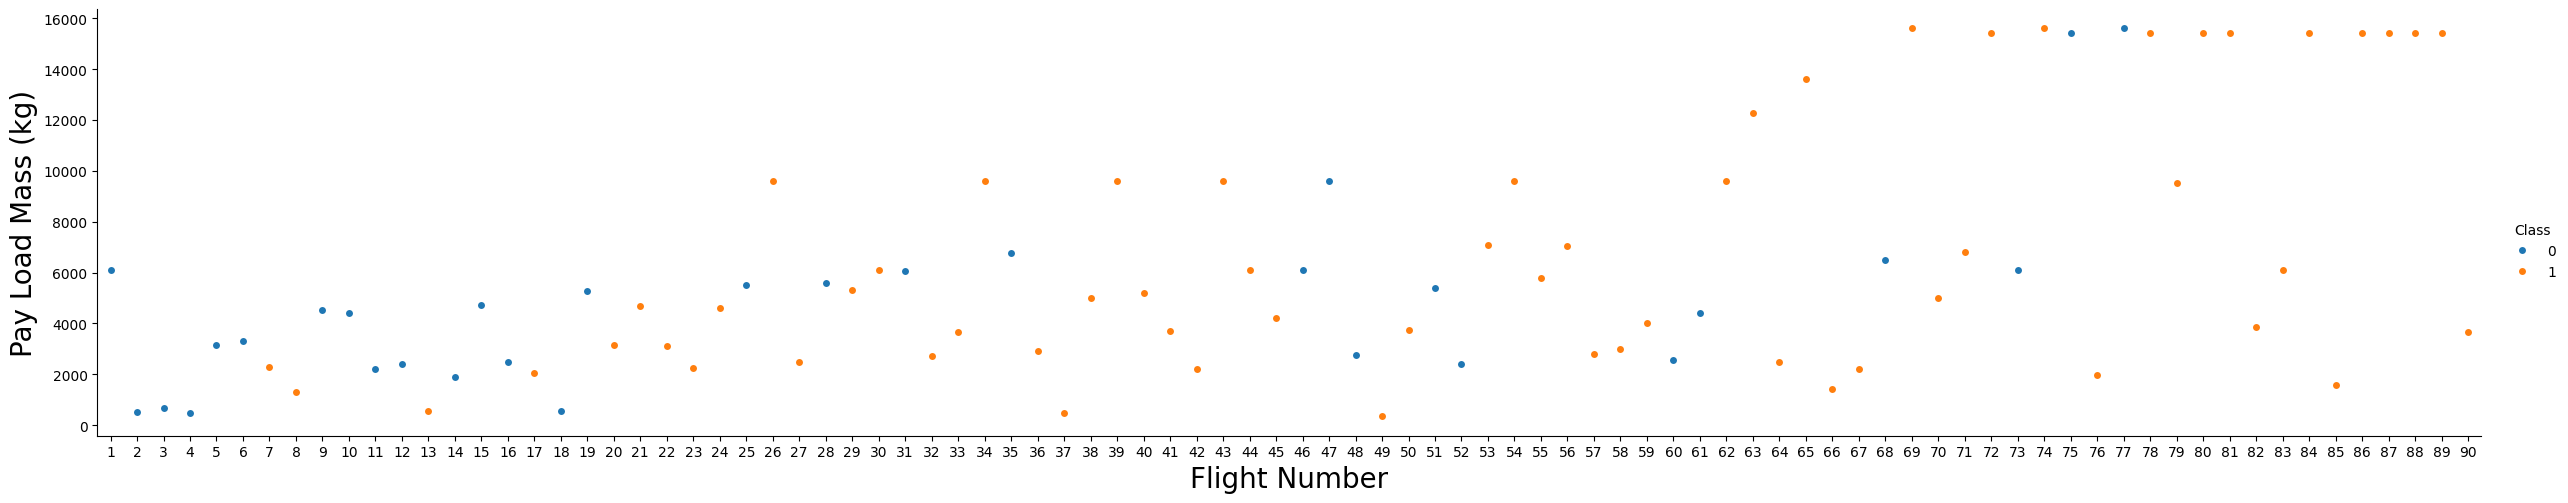

In [6]:
plt.figure(figsize=(12,10))
sns.catplot(data=df, x='FlightNumber', y='PayloadMass', hue='Class', aspect=5)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Pay Load Mass (kg)', fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### TASK 1: Visualize the relationship between Flight Number and Launch Site

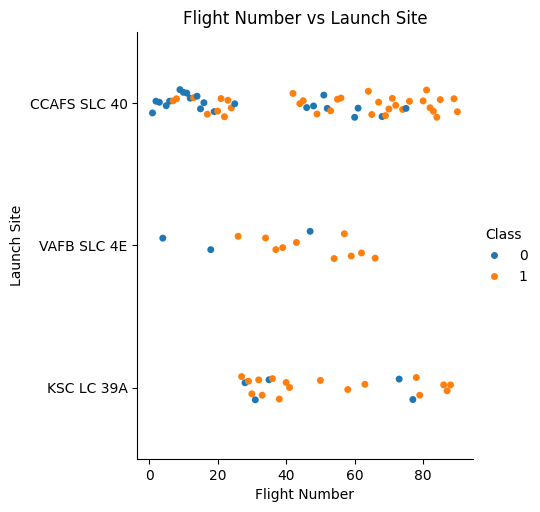

In [16]:
# Catplot
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs Launch Site')
plt.show()

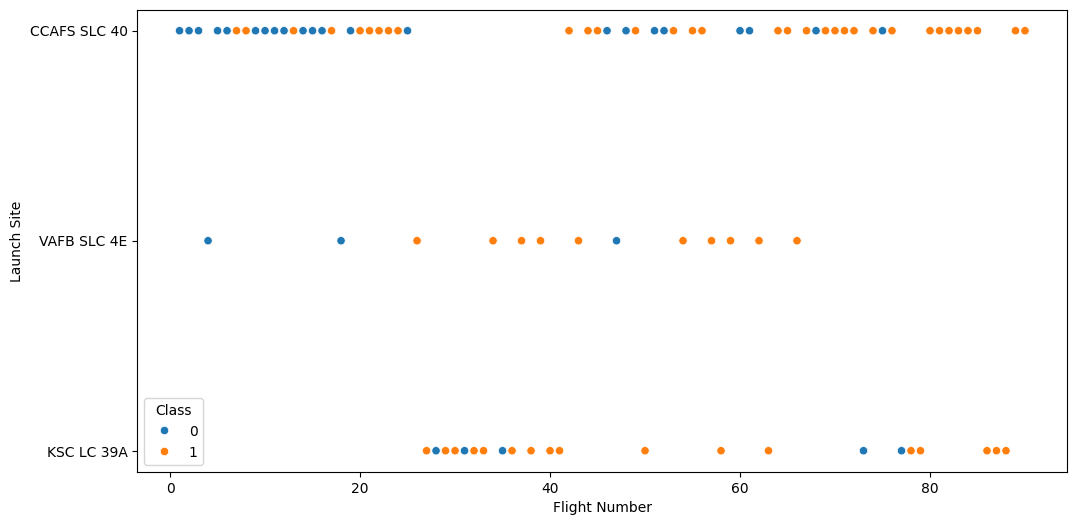

In [30]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class valueplt.figure(figsize=(10,6))

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

### TASK 2: Visualize the relationship between Payload and Launch Site


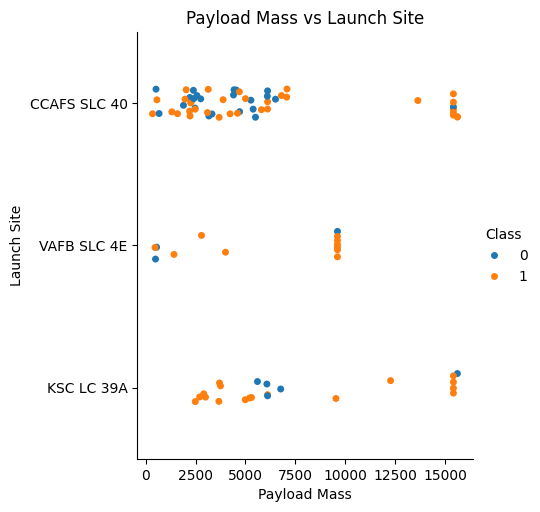

In [21]:
# catplot
sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.xlabel('Payload Mass')
plt.ylabel('Launch Site')
plt.title('Payload Mass vs Launch Site')
plt.show()

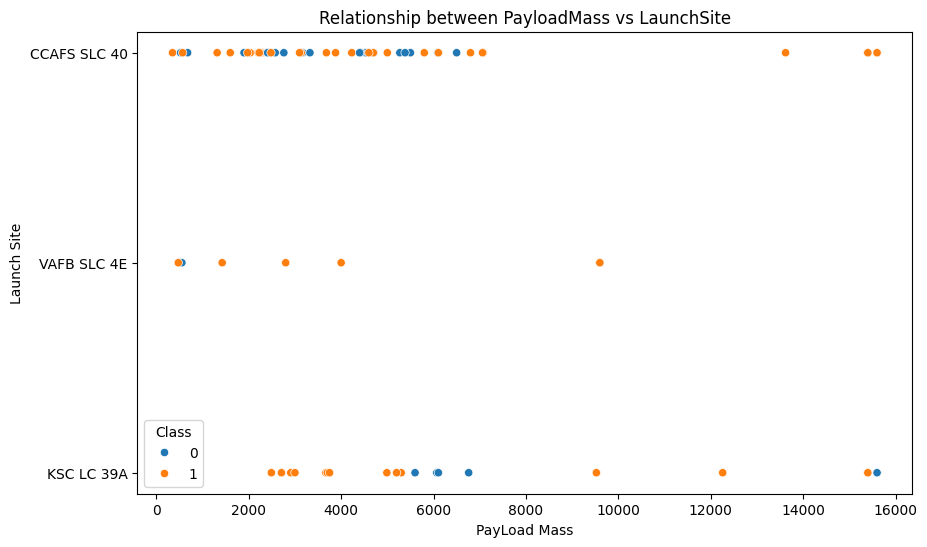

In [31]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class')
plt.xlabel('PayLoad Mass')
plt.ylabel('Launch Site')
plt.title('Relationship between PayloadMass vs LaunchSite')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### TASK 3: Visualize the relationship between success rate of each orbit type

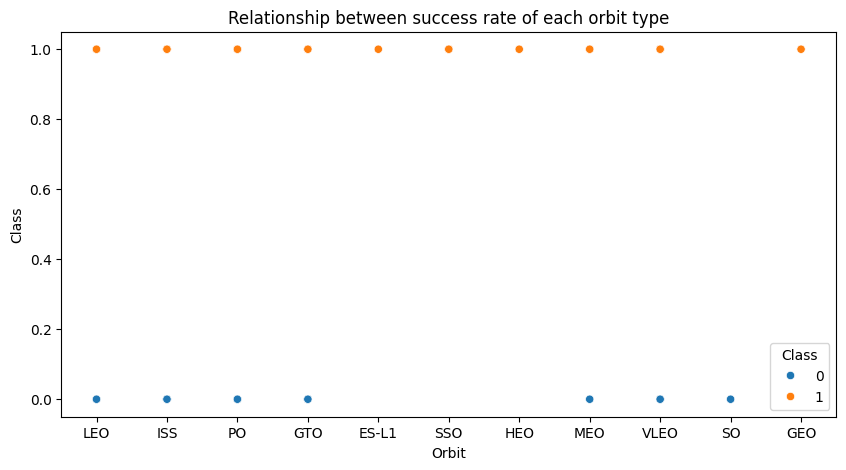

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Orbit', y='Class', hue='Class')
plt.xlabel('Orbit')
plt.ylabel('Class')
plt.title('Relationship between success rate of each orbit type')
plt.show()

Let's create a `bar chart` for the sucess rate of each orbit

In [37]:
# HINT use groupby method on Orbit column and get the mean of Class column
success_rate = df.groupby('Orbit')['Class'].mean()
success_rate

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

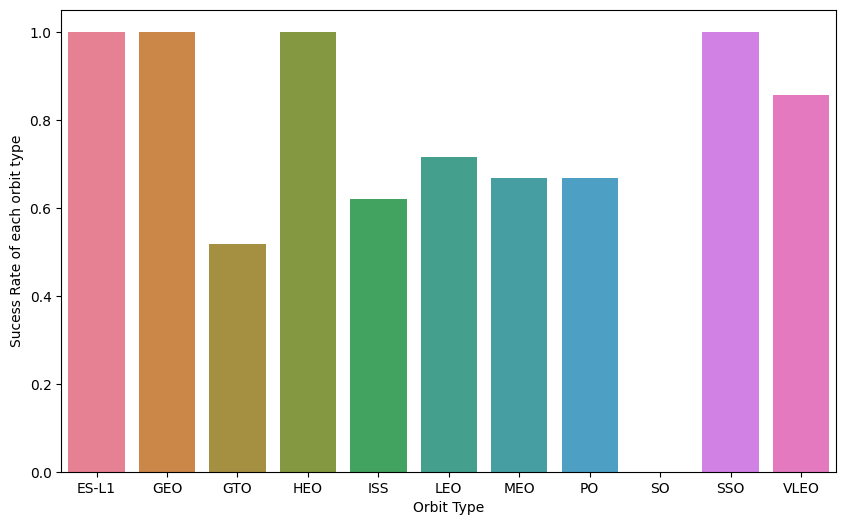

In [127]:
# bar chart for the success rate of each orbit
plt.figure(figsize=(10,6))
sns.barplot(x=success_rate.index, y=success_rate.values, hue=success_rate.index, legend=False)
plt.xlabel('Orbit Type')
plt.ylabel('Sucess Rate of each orbit type')
plt.show()

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

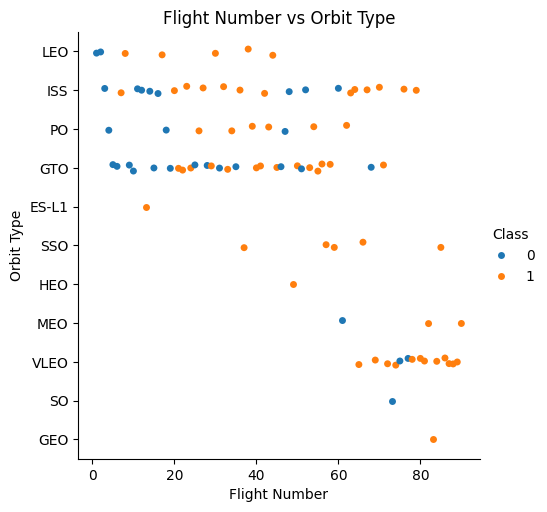

In [43]:
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.title('Flight Number vs Orbit Type')
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

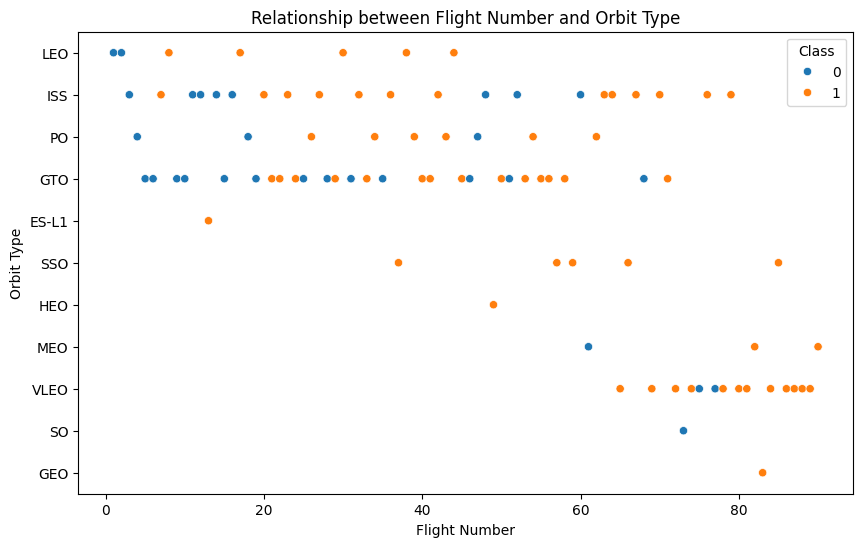

In [46]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.title('Relationship between Flight Number and Orbit Type')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK  5: Visualize the relationship between Payload and Orbit type

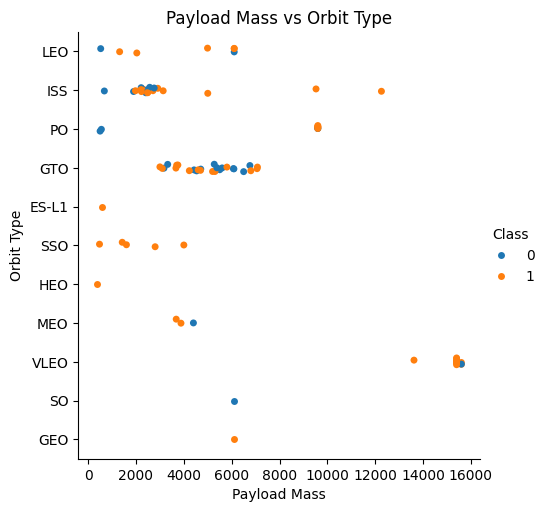

In [48]:
# catplot
sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.xlabel('Payload Mass')
plt.ylabel('Orbit Type')
plt.title('Payload Mass vs Orbit Type')
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

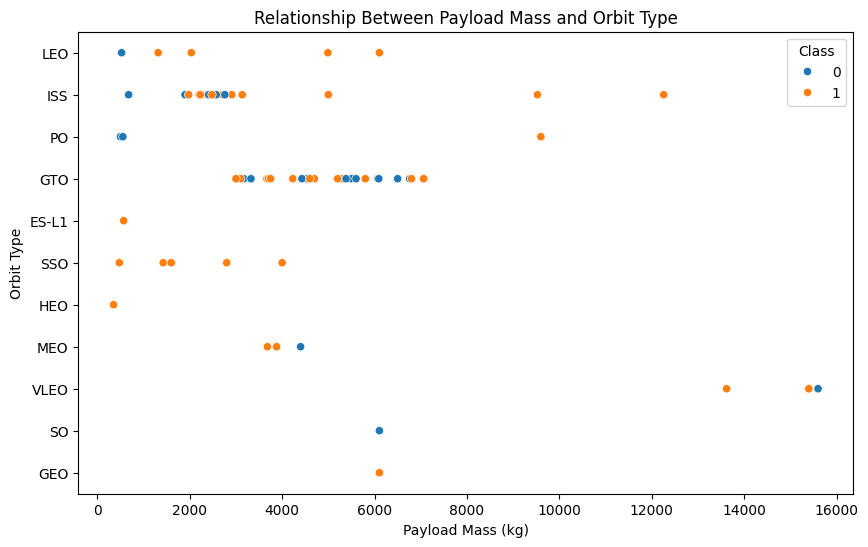

In [52]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.title('Relationship Between Payload Mass and Orbit Type')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### TASK  6: Visualize the launch success yearly trend

In [64]:
# loop to Extract years from the date 
year = []
for i in df['Date']:
    year.append(i.split('-')[0])

In [65]:
# adding new column year in dataframe
df['Year'] = year

In [69]:
# finding average success rate of each year 
yearly_trend = df.groupby('Year')['Class'].mean()
yearly_trend

Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

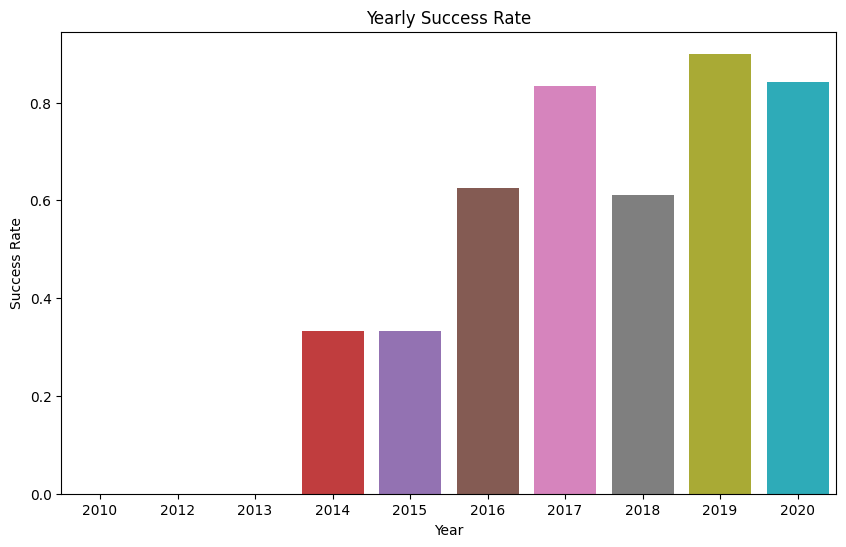

In [126]:
# bar chart of yearly success rate

plt.figure(figsize=(10,6))
sns.barplot(x=yearly_trend.index, y=yearly_trend.values, hue=yearly_trend.index, legend=False)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Yearly Success Rate')
plt.show()

### Plot a line chart with x axis to be the extracted year and y axis to be the success rate

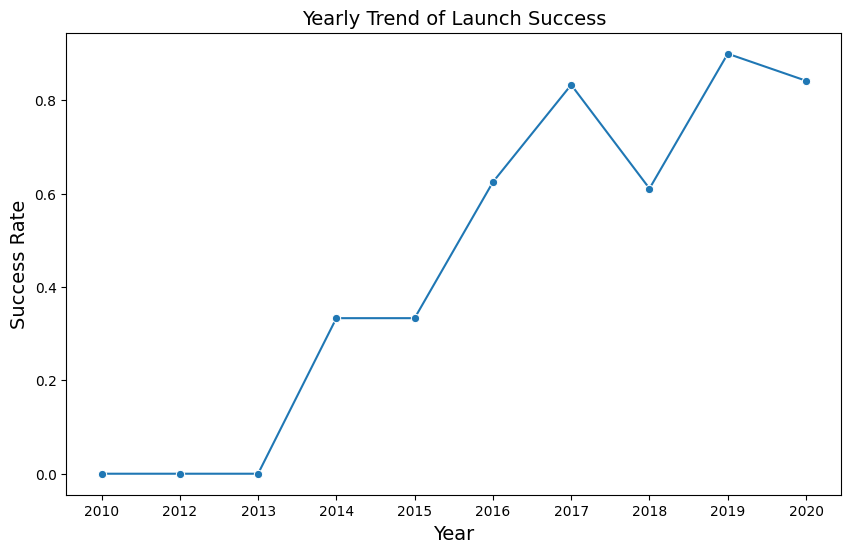

In [80]:
yearly_trend = df.groupby('Year')['Class'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend, marker='o')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.title('Yearly Trend of Launch Success', fontsize=14)
plt.show()

### Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [105]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [113]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`

In [114]:
features_one_hot = features_one_hot.select_dtypes(include=['int64', 'float64'])
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount
0,1.0,6104.959412,1.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0


In [116]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
Block           float64
ReusedCount     float64
dtype: object

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


We can now export it to a CSV

In [118]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

### Thank you
## Author

[Neelesh Chidar](https://www.linkedin.com/in/neeleshchidar37/)

####  Special Thanks to IBM Skills Network team for content